In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.style as style

#Set plot style
style.use('seaborn-darkgrid')

In [3]:
#Get S&P 500, Nasdaq, and Dow Jones Ticker info
sp500 = yf.Ticker('^GSPC')
nasdaq = yf.Ticker('^IXIC')
russell2000 = yf.Ticker('^RUT')

#Get 2008 recession data from 3 indexes and drop unneeded columns
sp500_2008_recession = sp500.history(start='2006-01-01', end='2011-12-31')
sp500_2008_recession.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)
nasdaq_2008_recession = nasdaq.history(start='2006-01-01', end='2011-12-31')
nasdaq_2008_recession.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)
russell2000_2008_recession = russell2000.history(start='2006-01-01', end='2011-12-31')
russell2000_2008_recession.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)

#Get Dotcom recession data from 3 indexes and drop unneeded columns
sp500_dotcom_recession = sp500.history(start='1999-01-01', end='2004-12-31')
sp500_dotcom_recession.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)
nasdaq_dotcom_recession = nasdaq.history(start='1999-01-01', end='2004-12-31')
nasdaq_dotcom_recession.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)
russell2000_dotcom_recession = russell2000.history(start='1999-01-01', end='2004-12-31')
russell2000_dotcom_recession.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)

#Get 1990 recession data from 3 indexes and drop unneeded columns
sp500_1990_recession = sp500.history(start='1989-01-01', end='1991-12-31')
sp500_1990_recession.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)
nasdaq_1990_recession = nasdaq.history(start='1989-01-01', end='1991-12-31')
nasdaq_1990_recession.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)
russell2000_1990_recession = russell2000.history(start='1989-01-01', end='1991-12-31')
russell2000_1990_recession.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)

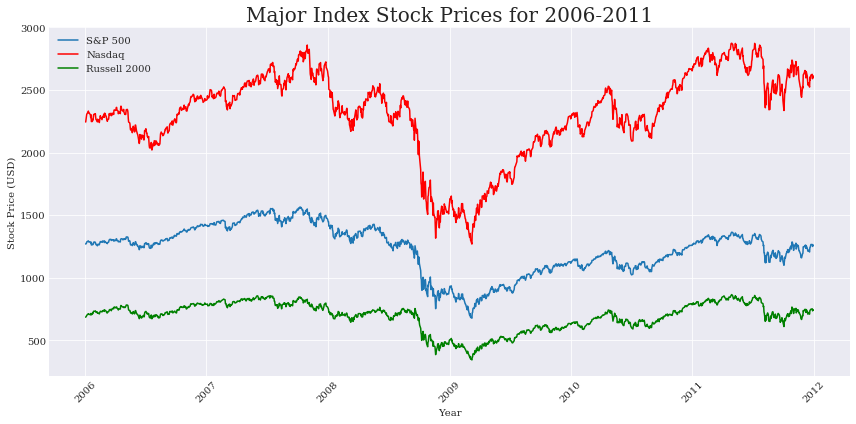

In [4]:
#Plot 2008 recession data for each index
plt.figure(figsize=(12,6))
plt.rc('font', family='serif')
plt.plot(sp500_2008_recession.index,sp500_2008_recession['Close'],label='S&P 500')
plt.plot(nasdaq_2008_recession.index,nasdaq_2008_recession['Close'],label='Nasdaq',color='red')
plt.plot(russell2000_2008_recession.index,russell2000_2008_recession['Close'],label='Russell 2000',color='green')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('Major Index Stock Prices for 2006-2011',fontsize=20)
plt.legend()
plt.tight_layout()
plt.savefig('Images/Major Index Stock Prices for 2006-2011.png')

(Timestamp('2007-10-31 00:00:00'), Timestamp('2009-03-09 00:00:00'))

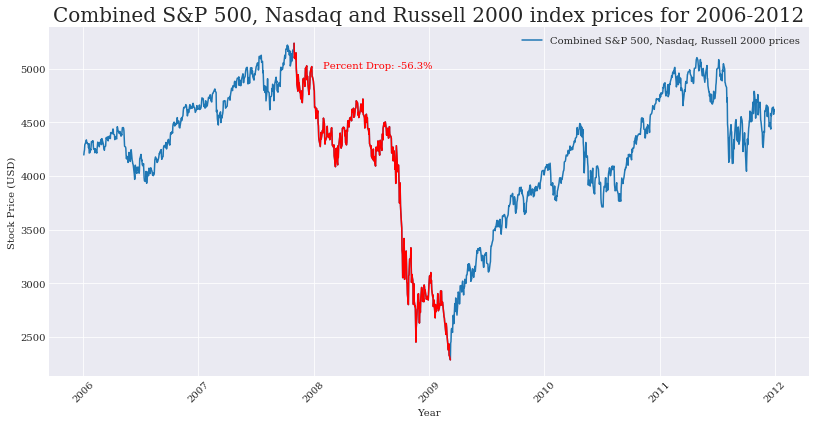

In [9]:
#Plot Combined S&P 500, Nasdaq, and Russell 2000 Index for 2008 recession data
plt.figure(figsize=(12,6))
plt.rc('font', family='serif')
combined_indexes_prices_2008 = sp500_2008_recession['Close'] + nasdaq_2008_recession['Close'] + russell2000_2008_recession['Close']
plt.plot(combined_indexes_prices_2008.index,combined_indexes_prices_2008,label='Combined S&P 500, Nasdaq, Russell 2000 prices')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('Combined S&P 500, Nasdaq and Russell 2000 index prices for 2006-2012',fontsize=20)
plt.tight_layout()
plt.legend()

#Plot max drop % on plot
max_price_2008 = combined_indexes_prices_2008.max()
min_price_2008 = combined_indexes_prices_2008.min()
max_price_date_2008 = combined_indexes_prices_2008[combined_indexes_prices_2008==max_price_2008].index[0]
min_price_date_2008 = combined_indexes_prices_2008[combined_indexes_prices_2008==min_price_2008].index[0]
max_drop_2008 = combined_indexes_prices_2008.loc[max_price_date_2008:min_price_date_2008]
plt.plot(max_drop_2008.index,max_drop_2008,color='red')
percent_drop_2008 = ((max_price_2008-min_price_2008)/max_price_2008)*100
percent_drop_2008_annotation = f'Percent Drop: -{round(percent_drop_2008,2)}%'
plt.annotate(percent_drop_2008_annotation,(combined_indexes_prices_2008.index[520],5000),color='red')
plt.savefig('Images/Combined S&P 500, Nasdaq and Russell 2000 index prices for 2006-2012')
max_price_date_2008,min_price_date_2008

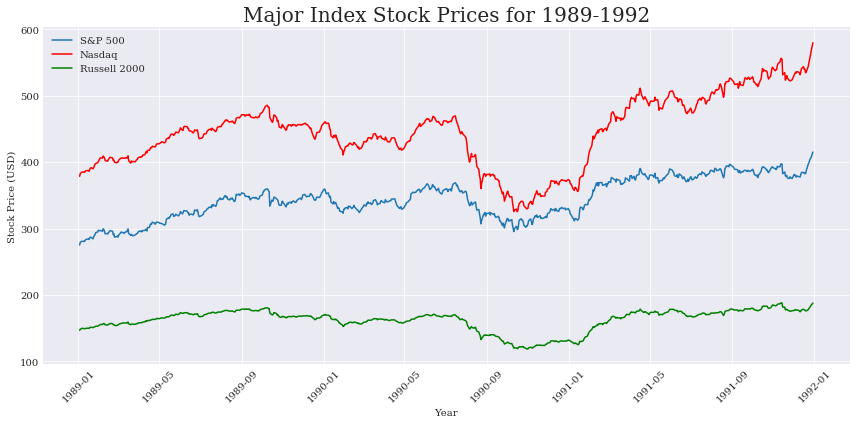

In [6]:
#Plot 1990 recession data for each index
plt.figure(figsize=(12,6))
plt.rc('font', family='serif')
plt.plot(sp500_1990_recession.index,sp500_1990_recession['Close'],label='S&P 500')
plt.plot(nasdaq_1990_recession.index,nasdaq_1990_recession['Close'],label='Nasdaq',color='red')
plt.plot(russell2000_1990_recession.index,russell2000_1990_recession['Close'],label='Russell 2000',color='green')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('Major Index Stock Prices for 1989-1992',fontsize=20)
plt.legend()
plt.tight_layout()
plt.savefig('Images/Major Index Stock Prices for 1989-1992')

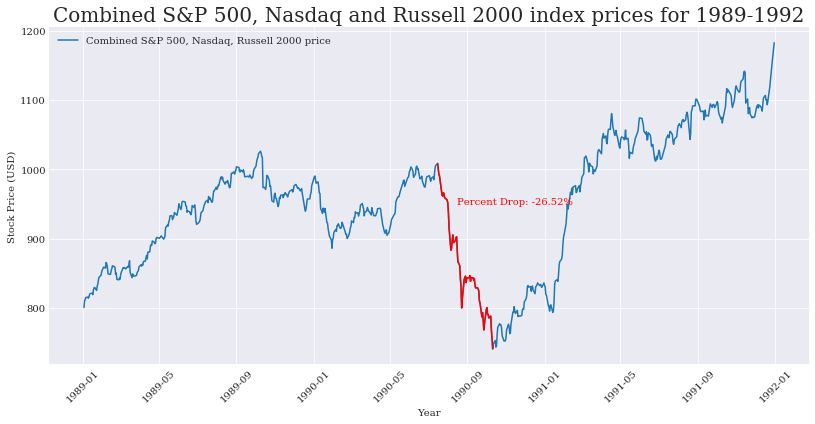

In [10]:
#Plot Combined S&P 500, Nasdaq, and Russell 2000 Index for 1990 recession data
plt.figure(figsize=(12,6))
plt.rc('font', family='serif')
combined_indexes_prices_1990 = sp500_1990_recession['Close'] + nasdaq_1990_recession['Close'] + russell2000_1990_recession['Close']
plt.plot(combined_indexes_prices_1990.index,combined_indexes_prices_1990,label='Combined S&P 500, Nasdaq, Russell 2000 price')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('Combined S&P 500, Nasdaq and Russell 2000 index prices for 1989-1992',fontsize=20)
plt.legend()
plt.tight_layout()

#Plot max drop % on plot
drop_dotcom = combined_indexes_prices_1990.loc['1990-05-01':'1991-01-01']
max_price_1990 = drop_dotcom.max()
min_price_1990 = combined_indexes_prices_1990.min()
max_price_date_1990 = combined_indexes_prices_1990[combined_indexes_prices_1990==max_price_1990].index[0]
min_price_date_1990 = combined_indexes_prices_1990[combined_indexes_prices_1990==min_price_1990].index[0]
max_drop_1990 = combined_indexes_prices_1990.loc[max_price_date_1990:min_price_date_1990]
plt.plot(max_drop_1990.index,max_drop_1990,color='red')
percent_drop_1990 = ((max_price_1990-min_price_1990)/max_price_1990)*100
percent_drop_1990_annotation = f'Percent Drop: -{round(percent_drop_1990,2)}%'
plt.annotate(percent_drop_1990_annotation,(combined_indexes_prices_1990.index[410],950),color='red')
plt.savefig('Images/Combined S&P 500, Nasdaq and Russell 2000 index prices for 1989-1992')

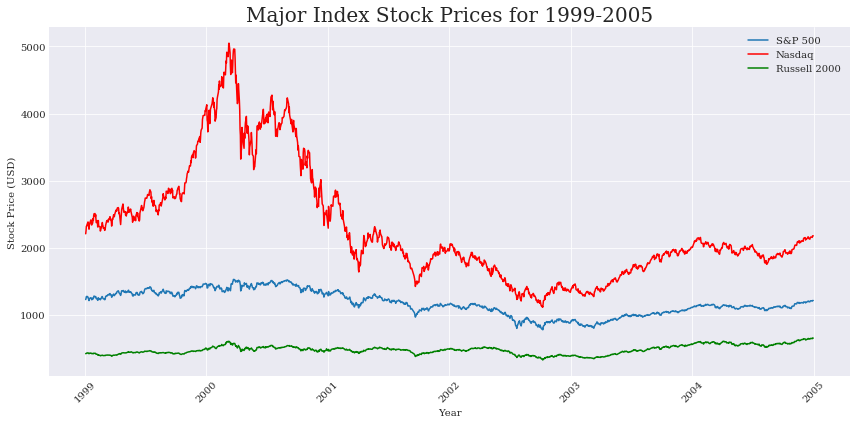

In [8]:
#Plot dotcom recession data for each index
plt.figure(figsize=(12,6))
plt.rc('font', family='serif')
plt.plot(sp500_dotcom_recession.index,sp500_dotcom_recession['Close'],label='S&P 500')
plt.plot(nasdaq_dotcom_recession.index,nasdaq_dotcom_recession['Close'],label='Nasdaq',color='red')
plt.plot(russell2000_dotcom_recession.index,russell2000_dotcom_recession['Close'],label='Russell 2000',color='green')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('Major Index Stock Prices for 1999-2005',fontsize=20)
plt.legend()
plt.tight_layout()
plt.savefig('Images/Major Index Stock Prices for 1999-2005')

(Timestamp('2000-03-24 00:00:00'), Timestamp('2002-10-09 00:00:00'))

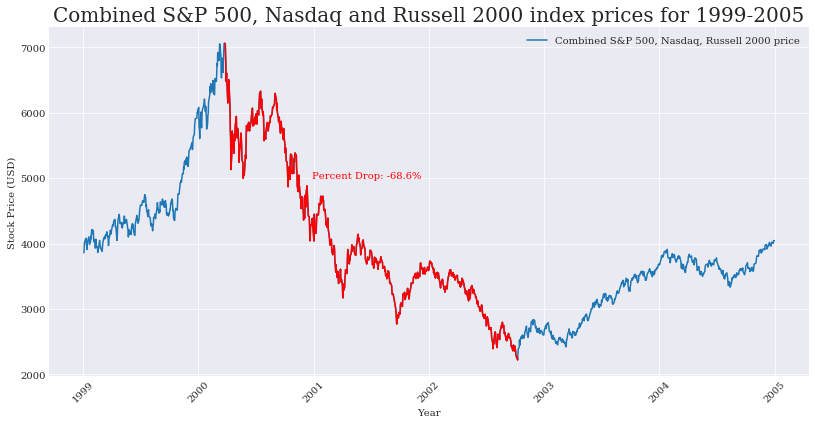

In [11]:
#Plot Combined S&P 500, Nasdaq, and Russell 2000 Index for dotcom recession data
plt.figure(figsize=(12,6))
plt.rc('font', family='serif')
combined_indexes_prices_dotcom = sp500_dotcom_recession['Close'] + nasdaq_dotcom_recession['Close'] + russell2000_dotcom_recession['Close']
plt.plot(combined_indexes_prices_dotcom.index,combined_indexes_prices_dotcom,label='Combined S&P 500, Nasdaq, Russell 2000 price')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('Combined S&P 500, Nasdaq and Russell 2000 index prices for 1999-2005',fontsize=20)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1),loc='upper right')

#Plot max drop % on plot
max_price_dotcom = combined_indexes_prices_dotcom.max()
min_price_dotcom = combined_indexes_prices_dotcom.min()
max_price_date_dotcom = combined_indexes_prices_dotcom[combined_indexes_prices_dotcom==max_price_dotcom].index[0]
min_price_date_dotcom = combined_indexes_prices_dotcom[combined_indexes_prices_dotcom==min_price_dotcom].index[0]
max_drop_dotcom = combined_indexes_prices_dotcom.loc[max_price_date_dotcom:min_price_date_dotcom]
plt.plot(max_drop_dotcom.index,max_drop_dotcom,color='red')
percent_drop_dotcom = ((max_price_dotcom-min_price_dotcom)/max_price_dotcom)*100
percent_drop_dotcom_annotation = f'Percent Drop: -{round(percent_drop_dotcom,2)}%'
plt.annotate(percent_drop_dotcom_annotation,(combined_indexes_prices_dotcom.index[500],5000),color='red')
plt.savefig('Images/Combined S&P 500, Nasdaq and Russell 2000 index prices for 1999-2005')
max_price_date_dotcom,min_price_date_dotcom

In [11]:
#Export combined S&P 500, Nasdaq, Russell 2000 price data to csv for each recession period
combined_indexes_prices_2008.to_csv('Resources/combined_2008_recession_data.csv')
combined_indexes_prices_1990.to_csv('Resources/combined_dotcom_recession_data.csv')
combined_indexes_prices_dotcom.to_csv('Resources/combined_1990_recession_data.csv')

Ttest_1sampResult(statistic=-4.62429531677256, pvalue=5.35386742262377e-06)

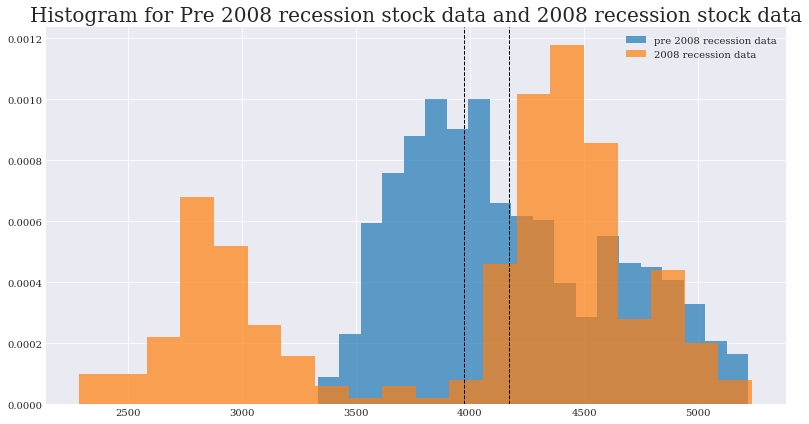

In [12]:
#Collect pre 2008 recession data for sp500, nasdaq, russell 2000 and combine the data
for x in range(len(combined_indexes_prices_2008.index)):
    if combined_indexes_prices_2008.index[x] == max_price_date_2008:
        end_date_2008_predata = combined_indexes_prices_2008.index[x-1]

sp500_pre_2008_recession_data = sp500.history(start='2004-01-01',end=end_date_2008_predata)
sp500_pre_2008_recession_data.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)

nasdaq_pre_2008_recession_data = nasdaq.history(start='2004-01-01',end=end_date_2008_predata)
nasdaq_pre_2008_recession_data.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)

russell2000_pre_2008_recession_data = russell2000.history(start='2004-01-01',end=end_date_2008_predata)
russell2000_pre_2008_recession_data.drop(['Open','High','Low','Dividends','Stock Splits'],inplace=True,axis=1)

combined_pre_2008_recession_data = sp500_pre_2008_recession_data['Close'] + nasdaq_pre_2008_recession_data['Close'] + russell2000_pre_2008_recession_data['Close']

#TTest 2008 recession data vs non-recession data
plt.figure(figsize=(12,6))
plt.rc('font', family='serif')
plt.hist(combined_pre_2008_recession_data, 20, density=True, alpha=0.7, label="pre 2008 recession data")
plt.hist(max_drop_2008, 20, density=True, alpha=0.7, label="2008 recession data")
plt.axvline(combined_pre_2008_recession_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(max_drop_2008.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram for Pre 2008 recession stock data and 2008 recession stock data',fontsize=20)
plt.legend()  
plt.tight_layout()
plt.savefig('Images/Histogram for Pre 2008 recession stock data and 2008 recession stock data')
    
stats.ttest_1samp(max_drop_2008,combined_pre_2008_recession_data.mean())

In [23]:
#Convert daily data to monthly data for each recession period

def convert_daily_to_monthly(data):
    new_dataframe = pd.DataFrame(data)
    Years = [x.year for x in data.index]
    Months = [x.month for x in data.index]
    Days = [x.day for x in data.index]
    
    new_dataframe.reset_index(drop=True,inplace=True)
    
    new_dataframe['Year'] = Years
    new_dataframe['Month'] = Months
    new_dataframe['Day'] = Days
    
    new_dataframe_groupby = new_dataframe.groupby(['Year','Month'])
    new_dataframe_groupby['Close'].mean()
    
    new_dataframe_groupby = new_dataframe.groupby(['Year','Month'])
    monthly_data = new_dataframe_groupby['Close'].mean()
    new_dataframe_grouped = pd.DataFrame(monthly_data)
    new_dates = [pd.to_datetime(str(x),format='(%Y, %m)') for x in new_dataframe_grouped.index]
    monthly_data = pd.DataFrame({'Date':new_dates,'Price':monthly_data})
    monthly_data.set_index('Date',inplace=True)
    
    return monthly_data

monthly_2008_data = convert_daily_to_monthly(combined_indexes_prices_2008)
monthly_dotcom_data = convert_daily_to_monthly(combined_indexes_prices_dotcom)
monthly_1990_data = convert_daily_to_monthly(combined_indexes_prices_1990)

#Export Monthly Data to CSV
monthly_2008_data.to_csv('Resources/monthly_2008_data.csv')
monthly_dotcom_data.to_csv('Resources/monthly_dotcom_data.csv')
monthly_1990_data.to_csv('Resources/monthly_1990_data.csv')

In [34]:
#Make Combined Stock data for SP500, Nasdaq, and Russell 2000 for 1988-2015
sp500_1988to2020 = sp500.history(start='1988-01-01',end='2020-03-20')
nasdaq_1988to2020 = nasdaq.history(start='1988-01-01',end='2020-03-20')
russell2000_1988to2020 = russell2000.history(start='1988-01-01',end='2020-03-20')

combined_indexes_1988to2020 = sp500_1988to2020['Close'] + nasdaq_1988to2020['Close'] + russell2000_1988to2020['Close']
monthly_1988to2020 = convert_daily_to_monthly(combined_indexes_1988to2020)
combined_indexes_1988to2020_df = pd.DataFrame(combined_indexes_1988to2020)

#Export to CSV
monthly_1988to2020.to_csv('Resources/monthly_1988to2020_data.csv')
combined_indexes_1988to2020.to_csv('Resources/daily_1988to2020_data.csv')